In [ ]:
import pandas as pd

file_path = "C:/Git/2025_Multi_Objective_CMS/plots/data_250325_consumption_data_eta_frank.csv"

# Try using semicolon as the delimiter
df = pd.read_csv(file_path, sep=';')

# Preview the first few rows
print(df.head())

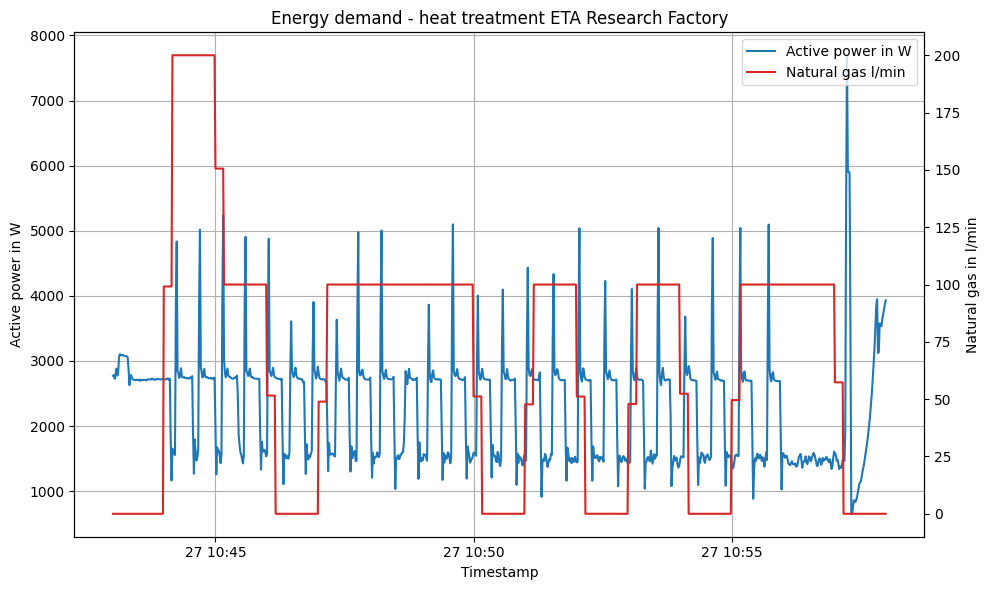

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Load and clean the data
df = pd.read_csv(file_path, sep=';', skiprows=1)
df.columns = ['From', 'To', 'active_power_in_watt', 'volume_flow_natural_gas_in_liter_per_min', 'volume_flow_nitrogen_in_liter_per_min', 'Unused']
df['active_power_in_watt'] = df['active_power_in_watt'].str.replace(',', '.').astype(float)
df['volume_flow_natural_gas_in_liter_per_min'] = df['volume_flow_natural_gas_in_liter_per_min'].str.replace(',', '.').astype(float)

# Convert timestamp
df['From'] = pd.to_datetime(df['From'], dayfirst=True)

# Create the figure and first axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot electricity on the left y-axis
ax1.plot(df['From'], df['active_power_in_watt'], label='Active power in W', color='tab:blue')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Active power in W', color='black')
ax1.tick_params(axis='y', labelcolor='black')
# ax1.legend(loc='upper left')
ax1.grid(True)

# Create second y-axis for natural gas and nitrogen
ax2 = ax1.twinx()
ax2.plot(df['From'], df['volume_flow_natural_gas_in_liter_per_min'], label='Natural gas l/min', color='tab:red')
ax2.set_ylabel('Natural gas in l/min', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Title and layout
plt.title('Energy demand - heat treatment ETA Research Factory')
fig.tight_layout()
plt.show()


In [23]:
# Calculate the gas volume in liters (flow rate is in l/min, so convert to l/s)
df['volume_flow_natural_gas_in_l_per_s'] = df['volume_flow_natural_gas_in_liter_per_min'] / 60

# Assuming 1-second intervals, integrate over time (sum of volume per second)
total_gas_consumed_liters = df['volume_flow_natural_gas_in_l_per_s'].sum()

print(f"Total natural gas consumed: {total_gas_consumed_liters:.2f} liters")


Total natural gas consumed: 1001.25 liters


In [22]:
# Sort by time just in case
df = df.sort_values('From')

# Compute time difference in seconds
df['delta_t'] = df['From'].diff().dt.total_seconds()

# Multiply power by delta_t to get energy in watt-seconds (Joules)
df['energy_Wh'] = (df['active_power_in_watt'] * df['delta_t']) / 3600  # Convert to Wh

# First row has NaN for delta_t — fill it with 0
df['energy_Wh'] = df['energy_Wh'].fillna(0)

# Total energy in kWh
total_energy_kWh = df['energy_Wh'].sum() / 1000

print(f"Total electrical energy consumed: {total_energy_kWh:.2f} kWh")


Total electrical energy consumed: 0.57 kWh


In [21]:
# Constants
LHV_kWh_per_liter = 0.00977  # Lower heating value in kWh/l
boiler_efficiency = 0.92     # 92% efficient boiler

# Energy calculation
energy_output_kWh = total_gas_consumed_liters * LHV_kWh_per_liter * boiler_efficiency

print(f"Useful thermal energy from gas in boiler: {energy_output_kWh:.2f} kWh")


Useful thermal energy from gas in boiler: 9.00 kWh


In [27]:
# Find the row with the maximum active power
peak_row = df.loc[df['active_power_in_watt'].idxmax()]

# Extract values
peak_power = peak_row['active_power_in_watt']
peak_time = peak_row['From']

print(f"🔺 Peak active power: {peak_power:.2f} W at {peak_time}")


🔺 Peak active power: 7696.24 W at 2021-05-27 10:57:14
